# Modelado de temas con PyCaret

#### https://towardsdatascience.com/topic-modeling-on-pycaret-2ce0c65ba3ff

### Instalación de la biblioteca y modelos de lenguaje 

In [4]:
#pip install pycaret
#python -m spacy download en_core_web_sm
#python -m textblob.download_corpora

### Importar PyCaret

In [3]:
from pycaret.nlp import *

### 1. Importar datos

In [5]:
import pandas as pd

In [14]:
path = "C:/Users/Arceus/Desktop/Themes.csv"

df = pd.read_csv(path)
df.head(5)

c:\users\arceus\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (12,25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,GLOBALEVENTID,SQLDATE,MonthYear,Year,FractionDate,Actor1Code,Actor1Name,Actor1CountryCode,Actor1KnownGroupCode,...,GCAM,SharingImage,RelatedImages,SocialImageEmbeds,SocialVideoEmbeds,Quotations,AllNames,Amounts,TranslationInfo,Extras
0,0,943928286.0,20200901.0,202009.0,2020.0,2020.6603,MEX,MEXICO,MEX,NaN,...,"wc:374,c1.2:1,c1.3:1,c12.1:16,c12.10:35,c12.11...",https://www.theedgemarkets.com/sites/default/f...,NaN,NaN,NaN,NaN,"New York,196;Zeneca Plc,472;Goldman Sachs Grou...","4,straight monthly gain,601;50,a barrel,740;40...",NaN,<PAGE_PRECISEPUBTIMESTAMP>20200831231500</PAGE...
1,1,943932111.0,20200901.0,202009.0,2020.0,2020.6603,MEX,MEXICO,MEX,NaN,...,"wc:637,c1.3:3,c12.1:43,c12.10:70,c12.12:26,c12...",https://www.alabamawx.com/wp-content/uploads/2...,NaN,NaN,https://youtube.com/user/abc3340;https://youtu...,NaN,"James Spann,12;Deep South,760;Weather Xtreme,1...","90,degrees,547;2,fronts into the state,1109;3,...",NaN,<PAGE_LINKS>http://www.alabamawx.com/?page_id=...
2,2,943946299.0,20200901.0,202009.0,2020.0,2020.6603,MEX,YUCATAN PENINSULA,MEX,NaN,...,"wc:218,c12.1:2,c12.10:18,c12.12:7,c12.13:6,c12...",NaN,NaN,NaN,https://youtube.com/user/SOUNDINGSmagazine;,NaN,"National Hurricane Center,61;Hurricane Laura,2...","4,hurricane,228;4,is forming on the,763;",NaN,<PAGE_AUTHORS>Carly Sisson</PAGE_AUTHORS><PAGE...
3,3,943946300.0,20200901.0,202009.0,2020.0,2020.6603,MEX,YUCATAN PENINSULA,MEX,NaN,...,"wc:218,c12.1:2,c12.10:18,c12.12:7,c12.13:6,c12...",NaN,NaN,NaN,https://youtube.com/user/SOUNDINGSmagazine;,NaN,"National Hurricane Center,61;Hurricane Laura,2...","4,hurricane,228;4,is forming on the,763;",NaN,<PAGE_AUTHORS>Carly Sisson</PAGE_AUTHORS><PAGE...
4,4,943952149.0,20200901.0,202009.0,2020.0,2020.6603,MEX,MEXICO,MEX,NaN,...,"wc:880,c12.1:40,c12.10:62,c12.12:26,c12.13:16,...",NaN,NaN,NaN,NaN,NaN,"From Texas Standard,20;Border Protection,83;Ho...","2,months,1999;2,agonizing days,2900;3,nights w...",NaN,<PAGE_LINKS>https://www.cbp.gov/newsroom/local...


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47680 entries, 0 to 47679
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  47680 non-null  int64  
 1   GLOBALEVENTID               47680 non-null  float64
 2   SQLDATE                     47680 non-null  float64
 3   MonthYear                   47680 non-null  float64
 4   Year                        47680 non-null  float64
 5   FractionDate                47680 non-null  float64
 6   Actor1Code                  47680 non-null  object 
 7   Actor1Name                  47680 non-null  object 
 8   Actor1CountryCode           47680 non-null  object 
 9   Actor1KnownGroupCode        0 non-null      float64
 10  Actor1EthnicCode            0 non-null      float64
 11  Actor1Religion1Code         13 non-null     object 
 12  Actor1Religion2Code         5 non-null      object 
 13  Actor1Type1Code             557

### 2. Configuración del entorno

In [16]:
nlp = setup(data = df, target = 'Themes', custom_stopwords = [ 'rt', 'https', 'http', 'co', 'amp', 'the', ' the', 'the ', ' the ', 'tax', 'fncat', 'debt', 'econ', 'fear'])

Description,Value
session_id,7904
Documents,47680
Vocab Size,3150
Custom Stopwords,True


### 3. Creación del modelo

In [17]:
lda = create_model('lda', num_topics = 6, multi_core = True)

### 4. Asignación del modelo

In [18]:
df_lda = assign_model(lda)

In [19]:
df_lda.head(10)

,Unnamed: 0,GLOBALEVENTID,SQLDATE,MonthYear,Year,FractionDate,Actor1Code,Actor1Name,Actor1CountryCode,Actor1KnownGroupCode,...,TranslationInfo,Extras,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Dominant_Topic,Perc_Dominant_Topic
0,0,943928286.0,20200901.0,202009.0,2020.0,2020.6603,MEX,MEXICO,MEX,NaN,...,NaN,<PAGE_PRECISEPUBTIMESTAMP>20200831231500</PAGE...,0.234362,0.003846,0.003842,0.003855,0.151059,0.603035,Topic 5,0.60
1,1,943932111.0,20200901.0,202009.0,2020.0,2020.6603,MEX,MEXICO,MEX,NaN,...,NaN,<PAGE_LINKS>http://www.alabamawx.com/?page_id=...,0.950602,0.009885,0.009985,0.009837,0.009846,0.009846,Topic 0,0.95
2,2,943946299.0,20200901.0,202009.0,2020.0,2020.6603,MEX,YUCATAN PENINSULA,MEX,NaN,...,NaN,<PAGE_AUTHORS>Carly Sisson</PAGE_AUTHORS><PAGE...,0.960176,0.007975,0.007979,0.007968,0.007948,0.007955,Topic 0,0.96
3,3,943946300.0,20200901.0,202009.0,2020.0,2020.6603,MEX,YUCATAN PENINSULA,MEX,NaN,...,NaN,<PAGE_AUTHORS>Carly Sisson</PAGE_AUTHORS><PAGE...,0.960176,0.007975,0.007979,0.007968,0.007948,0.007955,Topic 0,0.96
4,4,943952149.0,20200901.0,202009.0,2020.0,2020.6603,MEX,MEXICO,MEX,NaN,...,NaN,<PAGE_LINKS>https://www.cbp.gov/newsroom/local...,0.068295,0.002506,0.002506,0.391496,0.002509,0.532689,Topic 5,0.53
5,5,943952150.0,20200901.0,202009.0,2020.0,2020.6603,MEX,MEXICO CITY,MEX,NaN,...,NaN,<PAGE_LINKS>https://www.cbp.gov/newsroom/local...,0.068275,0.002506,0.002506,0.391510,0.002509,0.532695,Topic 5,0.53
6,6,943952153.0,20200901.0,202009.0,2020.0,2020.6603,MEX,MEXICAN,MEX,NaN,...,NaN,<PAGE_LINKS>https://www.cbp.gov/newsroom/local...,0.068273,0.002506,0.002506,0.391509,0.002509,0.532699,Topic 5,0.53
7,7,943952155.0,20200901.0,202009.0,2020.0,2020.6603,MEXCVL,MEXICAN,MEX,NaN,...,NaN,<PAGE_LINKS>https://www.cbp.gov/newsroom/local...,0.068281,0.002506,0.002506,0.391496,0.002509,0.532703,Topic 5,0.53
8,8,943972675.0,20200901.0,202009.0,2020.0,2020.6603,MEX,MEXICO,MEX,NaN,...,NaN,<PAGE_LINKS>http://www.alabamawx.com/?page_id=...,0.953430,0.009333,0.009334,0.009282,0.009291,0.009331,Topic 0,0.95
9,9,943984683.0,20200901.0,202009.0,2020.0,2020.6603,MEX,MEXICO,MEX,NaN,...,NaN,<PAGE_LINKS>https://listverse.com/2020/08/06/t...,0.156705,0.000934,0.711379,0.069341,0.012288,0.049353,Topic 2,0.71


### Visualización de datos

In [20]:
plot_model(lda, plot='topic_distribution')

In [21]:
plot_model(lda, plot='topic_model')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.061797  0.215295       1        1  27.701171
5      0.043177 -0.161912       2        1  21.247219
4     -0.170242  0.144337       3        1  13.601362
2      0.043015  0.026372       4        1  13.266069
1      0.255471 -0.022539       5        1  13.116025
0     -0.233219 -0.201552       6        1  11.068154, topic_info=          Term           Freq          Total Category  logprob  loglift
17     natural   63251.000000   63251.000000  Default  30.0000  30.0000
6     disaster  109376.000000  109376.000000  Default  29.0000  29.0000
13      health   41321.000000   41321.000000  Default  28.0000  28.0000
152      water   30642.000000   30642.000000  Default  27.0000  27.0000
8    emergency   34828.000000   34828.000000  Default  26.0000  26.0000
..         ...            ...            ...      ...      ...      ...
81      affect    3661.387953   18272.007704   Topic6  -4.8779   0.5936
65    official    3955.090260   28478.448904   Topic6  -4.8008   0.2270
7      disease    3520.114925   33371.351582   Topic6  -4.9173  -0.0481
23      policy    3968.503114  172766.358839   Topic6  -4.7974  -1.5725
10   ethnicity    3166.391608   86573.722936   Topic6  -5.0232  -1.1073

[439 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
2628      6  0.997980  abert_towhee
160       1  0.906538         actor
160       4  0.093417         actor
33        2  0.227080        advice
33        4  0.109035        advice
...     ...       ...           ...
32        5  0.201337   worldmammal
32        6  0.149870   worldmammal
157       1  0.203686         wound
157       4  0.796014         wound
991       1  0.997853         youth

[751 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 6, 5, 3, 2, 1])

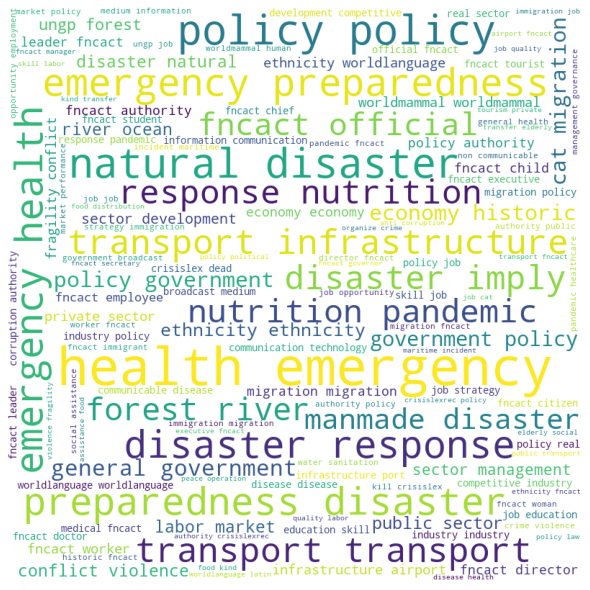

In [22]:
plot_model(lda, plot='wordcloud', topic_num = 'Topic 5')

In [23]:
plot_model(lda, plot='frequency', topic_num = 'Topic 5')

In [24]:
plot_model(lda, plot='bigram', topic_num = 'Topic 5')

In [25]:
plot_model(lda, plot='trigram', topic_num = 'Topic 5')

In [26]:
plot_model(lda, plot="pos")

In [27]:
plot_model(lda, plot='distribution', topic_num = 'Topic 5')

In [28]:
plot_model(lda, plot='sentiment', topic_num = 'Topic 5')

In [32]:
#plot_model(lda, plot='tsne')

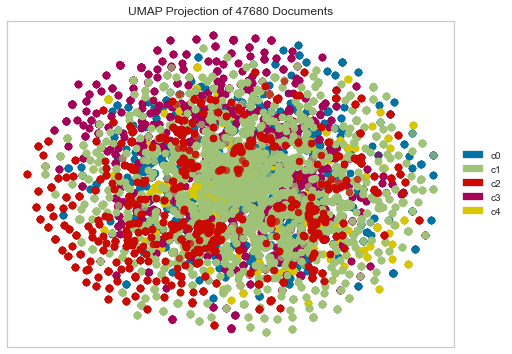

In [30]:
plot_model(lda, plot='umap')

In [34]:
evaluate_model(lda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Frequency Plot', 'freque…